# Protugese Bank 
### **Task 1: Data Analysis**

* Explored customer profiles, campaign performance, and economic indicators.
* Key findings:

  * Customers with **university education**, **no loans**, and **successful past contact outcomes** are more likely to subscribe.
  * **Fewer contact attempts** and **cellular communication** are more effective.
  * Subscription rates vary across **months** and **days of the week**.

---

### **Task 2: Predictive Modeling**

* Built and compared models like **Logistic Regression**, **Decision Tree**, and **Random Forest**.
* **Random Forest** provided the best performance in predicting customer subscription.
* Important features: `poutcome`, `contact`, `month`, `euribor3m`, and `campaign`.

---

### **Task 3: Marketing Suggestions**

* Focus on customers with **positive past interactions**.
* Use **cellular contact** and call during **effective months** like March and December.
* Avoid excessive calls; 1–2 contacts are more effective.
* Prioritize clients with **higher education** and **stable financial history**.



In [7]:
import pandas as pd
import numpy as np
from pandas import read_csv
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset
data = pd.read_csv("C:/Data/bank-additional/bank-additional-full.csv",sep = ';')
data.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
data.tail(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41178,62,retired,married,university.degree,no,no,no,cellular,nov,thu,...,2,6,3,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41179,64,retired,divorced,professional.course,no,yes,no,cellular,nov,fri,...,3,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41180,36,admin.,married,university.degree,no,no,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41181,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41182,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,...,1,9,1,success,-1.1,94.767,-50.8,1.028,4963.6,no
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

## Clean the dataset
### Deal with missing data

In [10]:
# Step 1: Delete the rows which colume 'poutcome' contains 'other'
condition = data.poutcome == 'other'
data1 = data.drop(data[condition].index, axis = 0, inplace = False)

In [12]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [14]:
# Step 2: Fill 'unknown' in job and education to 'other'
data[['job','education']] = data[['job','education']].replace(['unknown'],'other')

In [16]:
data1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [18]:
# Drop column "contact" which is useless
data2 = data1.drop('contact', axis=1)
data2.head()

,age,job,marital,education,default,housing,loan,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [20]:
# Change the unit of 'duration' from seconds to minutes
data2['duration'] = (data2['duration']/60).round(2)

In [22]:
data2.head()

,age,job,marital,education,default,housing,loan,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,may,mon,4.35,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,may,mon,2.48,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,may,mon,3.77,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,may,mon,2.52,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,may,mon,5.12,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [24]:
# Step 4: Change 'month' from words to numbers for easier analysis
lst = [data2]
for column in lst:
    column.loc[column["month"] == "jan", "month_int"] = 1
    column.loc[column["month"] == "feb", "month_int"] = 2
    column.loc[column["month"] == "mar", "month_int"] = 3
    column.loc[column["month"] == "apr", "month_int"] = 4
    column.loc[column["month"] == "may", "month_int"] = 5
    column.loc[column["month"] == "jun", "month_int"] = 6
    column.loc[column["month"] == "jul", "month_int"] = 7
    column.loc[column["month"] == "aug", "month_int"] = 8
    column.loc[column["month"] == "sep", "month_int"] = 9
    column.loc[column["month"] == "oct", "month_int"] = 10
    column.loc[column["month"] == "nov", "month_int"] = 11
    column.loc[column["month"] == "dec", "month_int"] = 12

In [26]:
# Step 1: Drop rows that 'duration' < 5s
condition2 = (data2['duration'] < (5/60))
data3 = data2.drop(data2[condition2].index, axis = 0, inplace = False)

In [28]:
data3.head(5)

,age,job,marital,education,default,housing,loan,month,day_of_week,duration,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,month_int
0,56,housemaid,married,basic.4y,no,no,no,may,mon,4.35,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,5.0
1,57,services,married,high.school,unknown,no,no,may,mon,2.48,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,5.0
2,37,services,married,high.school,no,yes,no,may,mon,3.77,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,5.0
3,40,admin.,married,basic.6y,no,no,no,may,mon,2.52,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,5.0
4,56,services,married,high.school,no,no,yes,may,mon,5.12,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,5.0


In [30]:
condition3 = (data3['education'] == 'other')
data4 = data3.drop(data3[condition3].index, axis = 0, inplace = False)

In [32]:
data4.head(5)

,age,job,marital,education,default,housing,loan,month,day_of_week,duration,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,month_int
0,56,housemaid,married,basic.4y,no,no,no,may,mon,4.35,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,5.0
1,57,services,married,high.school,unknown,no,no,may,mon,2.48,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,5.0
2,37,services,married,high.school,no,yes,no,may,mon,3.77,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,5.0
3,40,admin.,married,basic.6y,no,no,no,may,mon,2.52,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,5.0
4,56,services,married,high.school,no,no,yes,may,mon,5.12,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,5.0


## Exploratory Data Analysis

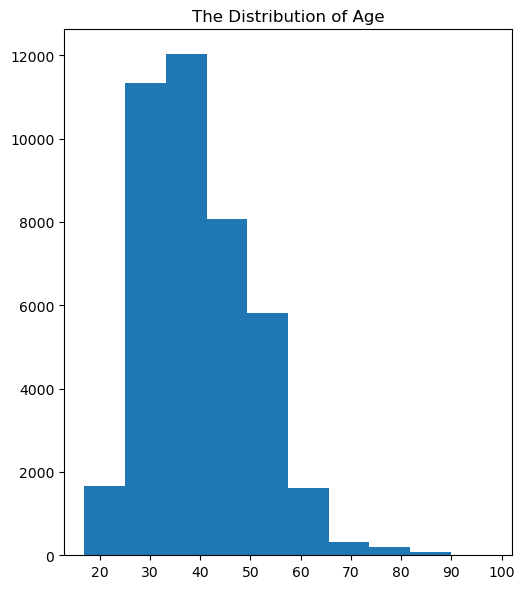

In [35]:
dist_age_balance = plt.figure(figsize = (10,6))

ra1 = dist_age_balance.add_subplot(1,2,1) 

ra1.hist(data4['age'])
ra1.set_title('The Distribution of Age')

plt.tight_layout() 
plt.show()

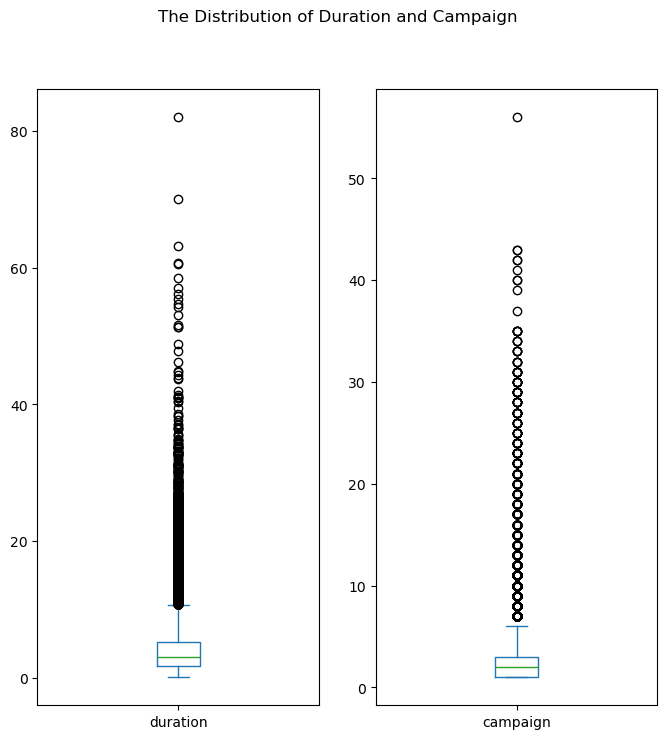

In [37]:
dist_dur_cam = data4[['duration','campaign']].plot(kind = 'box', 
                                                      figsize = (8,8),
                                                      subplots = True, layout = (1,2),
                                                      sharex = False, sharey = False,
                                                      title='The Distribution of Duration and Campaign')
plt.show()

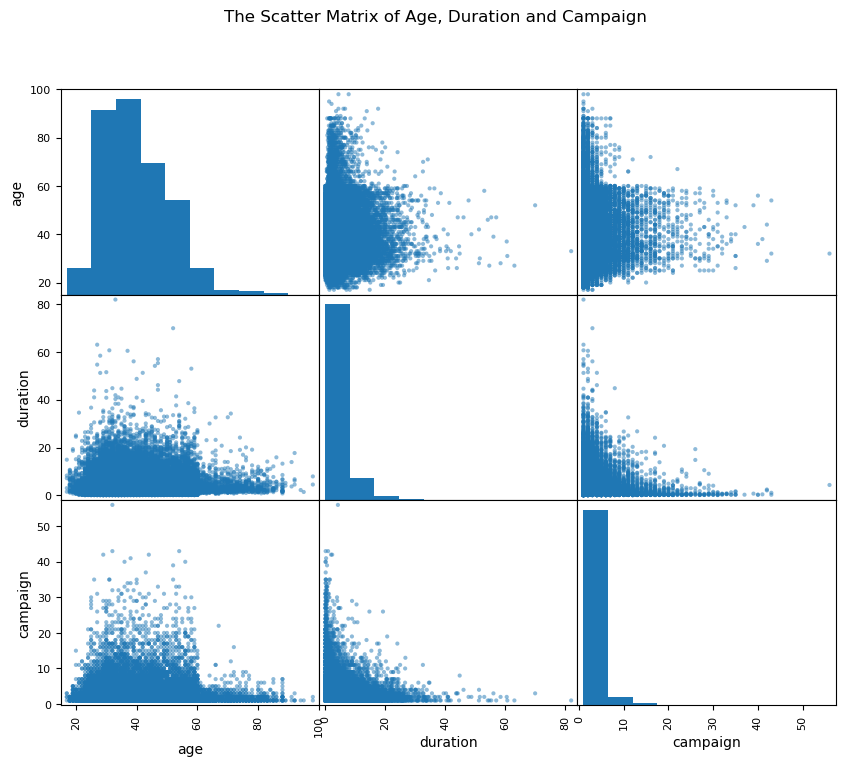

In [39]:
from pandas.plotting import scatter_matrix
matrix = scatter_matrix(data4[['age','duration','campaign']],figsize=(10,8))

plt.suptitle('The Scatter Matrix of Age, Duration and Campaign')
plt.show()

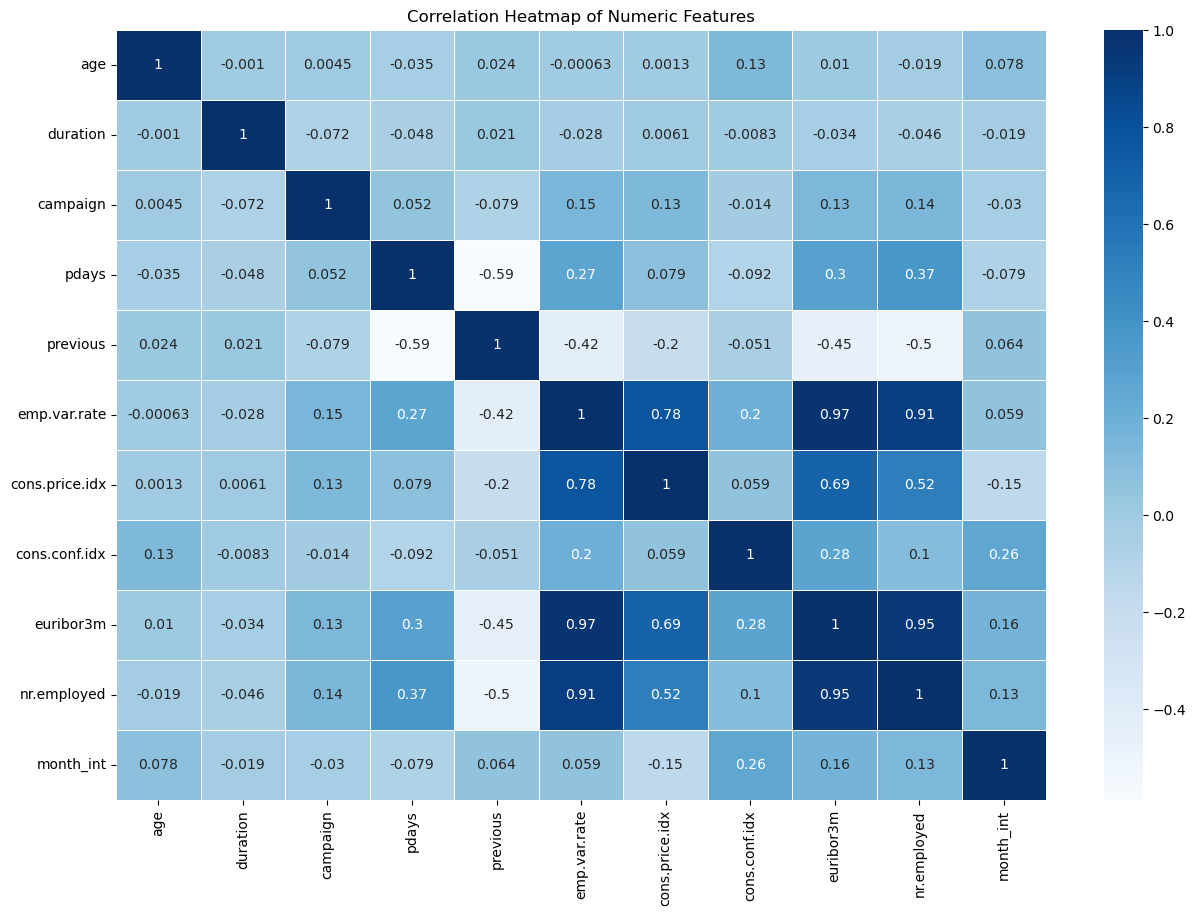

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Keep only numeric columns
corr1 = data4.select_dtypes(include='number').corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr1, linewidths=0.5, cmap='Blues', annot=True)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


## Machine Learning: Classification

### Load the cleaned dataset

In [45]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
balance_data = data4.apply(le.fit_transform)

In [47]:
balance_data.head()

,age,job,marital,education,default,housing,loan,month,day_of_week,duration,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,month_int
0,39,3,1,0,0,0,0,6,1,255,...,26,0,1,8,18,16,287,8,0,2
1,40,7,1,3,1,0,0,6,1,143,...,26,0,1,8,18,16,287,8,0,2
2,20,7,1,3,0,2,0,6,1,220,...,26,0,1,8,18,16,287,8,0,2
3,23,0,1,1,0,0,0,6,1,145,...,26,0,1,8,18,16,287,8,0,2
4,39,7,1,3,0,0,2,6,1,301,...,26,0,1,8,18,16,287,8,0,2


In [49]:
X = balance_data.drop(['y'] , axis = 1)
X.head()

,age,job,marital,education,default,housing,loan,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,month_int
0,39,3,1,0,0,0,0,6,1,255,0,26,0,1,8,18,16,287,8,2
1,40,7,1,3,1,0,0,6,1,143,0,26,0,1,8,18,16,287,8,2
2,20,7,1,3,0,2,0,6,1,220,0,26,0,1,8,18,16,287,8,2
3,23,0,1,1,0,0,0,6,1,145,0,26,0,1,8,18,16,287,8,2
4,39,7,1,3,0,0,2,6,1,301,0,26,0,1,8,18,16,287,8,2


In [51]:
Y = balance_data['y']
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int32

In [53]:
Y.tail()

41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, dtype: int32

### Compare classification algorithms

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [58]:
# 20% of the data will be used for testing
test_size= 0.20
seed = 7
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=test_size, random_state=seed)

In [60]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
# Fit only to the training data
scalar.fit(X_train)
# Now apply the transformations to the data
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)

In [62]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))

In [64]:
results_c = []
names_c = []

for name, model in models:
    # define how to split off validation data ('kfold' how many folds)
    kfold = KFold(n_splits=10, random_state=seed , shuffle=True)    
    # train the model
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')    
    results_c.append(cv_results)
    names_c.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.910629 (0.004112)
KNN: 0.900510 (0.005331)
CART: 0.887262 (0.003292)
NB: 0.859183 (0.002348)


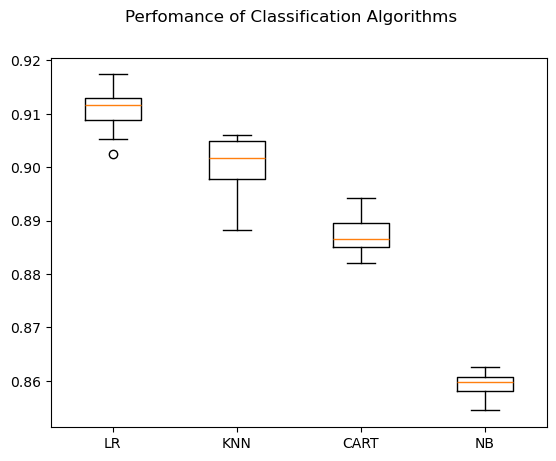

In [66]:
fig = plt.figure()
fig.suptitle('Perfomance of Classification Algorithms')
ax = fig.add_subplot(111)
plt.boxplot(results_c)
ax.set_xticklabels(names_c)
plt.show()

### Logistic Regression

In [69]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
LR = LogisticRegression()
log_reg_p = LR.fit(X_train, Y_train)

y_pred_logreg1 = log_reg_p.predict(X_test)

print(classification_report(Y_test,y_pred_logreg1))
print('accuracy score : ',accuracy_score(Y_test,y_pred_logreg1))
print(confusion_matrix(Y_test,y_pred_logreg1))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7291
           1       0.65      0.39      0.49       936

    accuracy                           0.91      8227
   macro avg       0.79      0.68      0.72      8227
weighted avg       0.89      0.91      0.90      8227

accuracy score :  0.9070134921599611
[[7095  196]
 [ 569  367]]


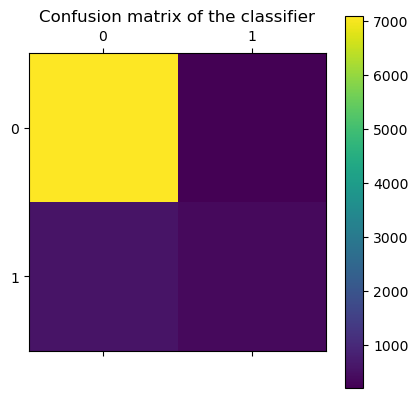

In [71]:
import pylab as pl
pl.matshow(confusion_matrix(Y_test,y_pred_logreg1))
pl.title('Confusion matrix of the classifier')
pl.colorbar()
pl.show()

### K-Neighbors Classifier

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.datasets import load_iris  # example dataset

# Load example dataset (replace this with your dataset)
data = load_iris()
X = data.data
y = data.target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train KNN classifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30

Accuracy Score: 0.9666666666666667
Confusion Matrix:
 [[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]


### Create Decision Tree classifer object

In [77]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.datasets import load_iris  # Example dataset

# Load example dataset (you can replace this with your own)
data = load_iris()
X = data.data
y = data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Decision Tree Classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy Score: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


### Gaussian NB

In [80]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb_reg_p = gnb.fit(X_train, y_train)

y_pred_gnbreg1 = gnb_reg_p.predict(X_test)

print(classification_report(y_test,y_pred_gnbreg1))
print('accuracy score : ',accuracy_score(y_test,y_pred_gnbreg1))
print(confusion_matrix(y_test,y_pred_gnbreg1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

accuracy score :  1.0
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


### Compare regression algorithms

In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [85]:
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('RIDGE', Ridge()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))

In [87]:
results_e2 = []
names_e2 = []

for name, model in models:
    # define how to split off validation data
    kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
    
    # train the model
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    results_e2.append(cv_results)
    names_e2.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -0.053573 (0.018988)
LASSO: -0.412278 (0.064837)
RIDGE: -0.052878 (0.020414)
EN: -0.200119 (0.043308)
KNN: -0.036667 (0.039215)
CART: -0.066667 (0.050000)


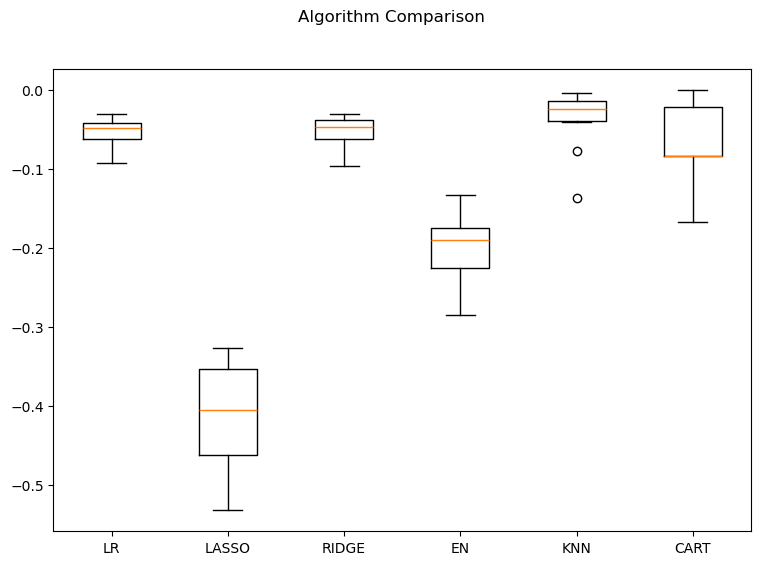

In [89]:
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)
plt.boxplot(results_e2)

fig.suptitle('Algorithm Comparison')
ax.set_xticklabels(names_e2)
plt.show()

### Stardardize Data

In [92]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledRIDGE', Pipeline([('Scaler', StandardScaler()),('RIDGE', Ridge())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))

In [94]:
results_e2_normalized = []
names_e2_normalized = []

for name, model in pipelines:
    # define how to split off validation data
    kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
    
    # train the model
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    results_e2_normalized.append(cv_results)
    names_e2_normalized.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -0.053573 (0.018988)
ScaledLASSO: -0.682519 (0.080909)
ScaledRIDGE: -0.053053 (0.018374)
ScaledEN: -0.381542 (0.061614)
ScaledKNN: -0.041667 (0.030377)
ScaledCART: -0.058333 (0.053359)


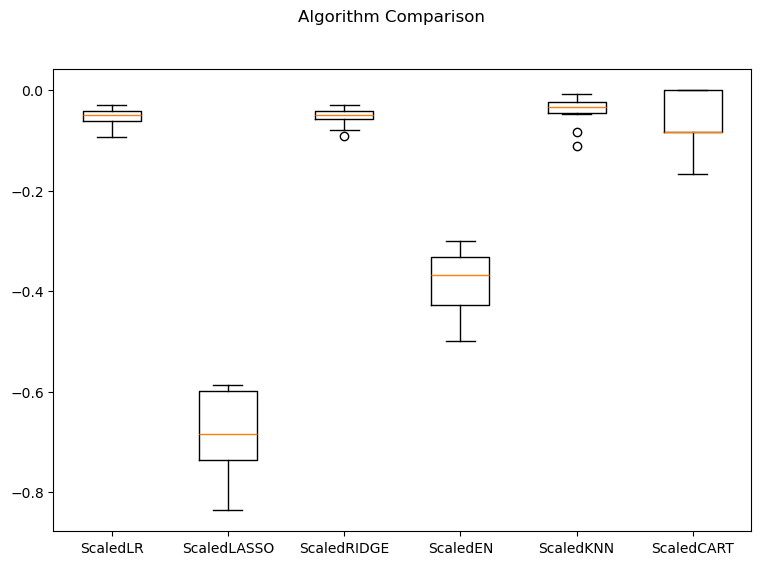

In [96]:
# Plot results
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)
plt.boxplot(results_e2_normalized)

fig.suptitle('Algorithm Comparison')
ax.set_xticklabels(names_e2_normalized)
plt.show()

### Test the RIDGE model on the test set

In [99]:
ridge = Ridge()
rdg_reg_q = ridge.fit(X_train, y_train)
y_pred_rdgreg = rdg_reg_q.predict(X_test)

from sklearn.metrics import mean_squared_error
print('The MSE is', mean_squared_error(y_test, y_pred_rdgreg))

The MSE is 0.03909724311678362


In [101]:
LR1 = LinearRegression()
log_reg_q = LR1.fit(X_train, y_train)

y_pred_linreg = log_reg_q.predict(X_test)

print('The MSE is', mean_squared_error(y_test, y_pred_linreg))

The MSE is 0.037113794407976845


In [103]:
las = Lasso()
las_reg_q = las.fit(X_train, y_train)
y_pred_lasreg = las_reg_q.predict(X_test)

print('The MSE is', mean_squared_error(y_test, y_pred_lasreg))

The MSE is 0.4165586042271026


In [105]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error

# Define and fit the model
eln = ElasticNet(alpha=1.0, l1_ratio=0.5)
eln.fit(X_train, y_train)

# Predict on test set
y_pred_elnreg = eln.predict(X_test)

# Print the Mean Squared Error
print('The MSE is', mean_squared_error(y_test, y_pred_elnreg))


The MSE is 0.19795594215652082


In [107]:
eln = ElasticNet(alpha=1.0, l1_ratio=0.5)
eln_reg_q = eln.fit(X_train, y_train)

y_pred_elnreg = eln_reg_q.predict(X_test)

print('The MSE is', mean_squared_error(y_test, y_pred_elnreg))

The MSE is 0.19795594215652082


In [111]:
kne = KNeighborsRegressor(n_neighbors=3)
kne_reg_q = kne.fit(X_train, y_train)

y_pred_knereg = kne_reg_q.predict(X_test)

print('The MSE is', mean_squared_error(y_test, y_pred_knereg))

The MSE is 0.007407407407407404


In [113]:
dtr = DecisionTreeRegressor()
dtr_reg_q = dtr.fit(X_train, y_train)

y_pred_dtrreg = dtr_reg_q.predict(X_test)

print('The MSE is', mean_squared_error(y_test, y_pred_dtrreg))

The MSE is 0.0
